## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear

#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_test.shape)
print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45,)
<class 'numpy.ndarray'>


In [56]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_test = []
          
    def initial_weight(self, weight_dimension, num_cls):

        
        
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        #########################################
        weight = np.random.normal(0, 0.01, (weight_dimension[0],weight_dimension[1]))
        
     
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data - self.sample_mean) / self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        #X_train = self.data_preprocessing(data=X_train)
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        y_temp = np.dot(X_train,self.weight)
        y_pred = np.argmax(y_temp,axis=1)
        scores_pred = [y_temp[i,y_pred[i]] for i in range(len(y_pred))]
        scores_y = [y_temp[i,y_train[i]] for i in range(len(y_train))]
        loss_vector = np.array(scores_pred) - np.array(scores_y)
        loss = np.sum(loss_vector)
        dW = np.zeros_like(self.weight)

        for i in range(len(y_train)):
            pred_index = y_pred[i]
            label_index = y_train[i]
            dW[:,pred_index] = X_train[i,:].T
            dW[:,label_index] = - X_train[i,:].T
                
        self.weight = self.weight - self.lr * dW
        train_acc = np.sum(y_pred == y_train) / len(y_train)
        
        
        
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        #X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None
       
        
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        y_temp = np.dot(X_test,self.weight)
        y_pred = np.argmax(y_temp,axis=1)
        test_acc = np.sum(y_pred == y_test)  / len(y_test)
        
           
        return test_acc
        
    def train(self):
        
        print("start")
        self.X_train = self.data_preprocessing(data=self.X_train)
        self.X_test = self.data_preprocessing(data=self.X_test)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        train_b = np.ones(num_sample).reshape((-1,1))
        test_b = np.ones(len(self.X_test)).reshape((-1,1))
#         zzz = np.hstack([self.X_train.T,train_b.T])
        self.X_train = np.hstack([np.array(self.X_train),np.array(train_b)])
#         print(self.X_train.shape)
        self.X_test = np.hstack([self.X_test,test_b])
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)            
            test_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_test.append(test_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'test_acc:%.3f'%test_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        test_acc = np.array(self.total_acc_test)
        plt.plot(train_acc)
        plt.plot(test_acc)
        plt.legend(['train_acc', 'test_acc'])
        plt.show()

start
epoch: 0 traing_acc:0.143 test_acc:0.111
epoch: 1 traing_acc:0.143 test_acc:0.111
epoch: 2 traing_acc:0.152 test_acc:0.133
epoch: 3 traing_acc:0.162 test_acc:0.133
epoch: 4 traing_acc:0.162 test_acc:0.133
epoch: 5 traing_acc:0.181 test_acc:0.178
epoch: 6 traing_acc:0.210 test_acc:0.200
epoch: 7 traing_acc:0.219 test_acc:0.200
epoch: 8 traing_acc:0.219 test_acc:0.244
epoch: 9 traing_acc:0.238 test_acc:0.289
epoch: 10 traing_acc:0.267 test_acc:0.311
epoch: 11 traing_acc:0.314 test_acc:0.311
epoch: 12 traing_acc:0.324 test_acc:0.333
epoch: 13 traing_acc:0.343 test_acc:0.333
epoch: 14 traing_acc:0.352 test_acc:0.356
epoch: 15 traing_acc:0.400 test_acc:0.467
epoch: 16 traing_acc:0.410 test_acc:0.489
epoch: 17 traing_acc:0.438 test_acc:0.489
epoch: 18 traing_acc:0.486 test_acc:0.533
epoch: 19 traing_acc:0.514 test_acc:0.533
epoch: 20 traing_acc:0.543 test_acc:0.556
epoch: 21 traing_acc:0.552 test_acc:0.556
epoch: 22 traing_acc:0.590 test_acc:0.578
epoch: 23 traing_acc:0.600 test_acc:0.

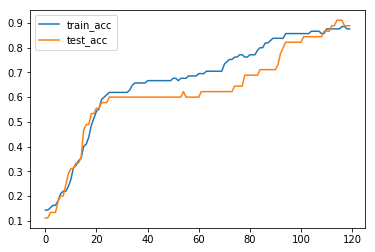

In [68]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

mulpla = MultiClsPLA(X_train, y_train, X_test, y_test, lr=0.0002, num_epoch=120, weight_dimension=(5,3), num_cls=3)
mulpla.train()
mulpla.vis_acc_curve()